#Pre-work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Analize and Cleaning Data

Podemos facilitar el manejo de los datos cambiandole los nombres a las características de  mayúsculas a minúsculas y abreviarlas

In [3]:
df.rename(columns = {'Item_Identifier' : 'item_id',
                     'Item_Weight' : 'item_w',
                     'Item_Fat_Content' : 'item_fat',
                     'Item_Visibility' : 'item_visib',
                     'Item_Type' : 'item_type',
                     'Item_MRP' : 'item_mrp',
                     'Outlet_Identifier' : 'outlet_id',
                     'Outlet_Establishment_Year' : 'outlet_estab_year',
                     'Outlet_Size' : 'outlet_size',
                     'Outlet_Location_Type' : 'outlet_loc_type',
                     'Outlet_Type' : 'outlet_type',
                     'Item_Outlet_Sales' : 'item_outlet_sales'},
          inplace = True)
df.head()

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            8523 non-null   object 
 1   item_w             7060 non-null   float64
 2   item_fat           8523 non-null   object 
 3   item_visib         8523 non-null   float64
 4   item_type          8523 non-null   object 
 5   item_mrp           8523 non-null   float64
 6   outlet_id          8523 non-null   object 
 7   outlet_estab_year  8523 non-null   int64  
 8   outlet_size        6113 non-null   object 
 9   outlet_loc_type    8523 non-null   object 
 10  outlet_type        8523 non-null   object 
 11  item_outlet_sales  8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Duplicate values

In [5]:
df[df.duplicated(keep=False)]

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales


In [6]:
df.duplicated().sum()

0

No hay duplicados

##Count missing values

In [7]:
df.isnull().sum()

item_id                 0
item_w               1463
item_fat                0
item_visib              0
item_type               0
item_mrp                0
outlet_id               0
outlet_estab_year       0
outlet_size          2410
outlet_loc_type         0
outlet_type             0
item_outlet_sales       0
dtype: int64

A 'item_w' le faltan 1463 datos y a 'outlet_size' 2410 datos. Para encontrar el mejor tratamiento para nuestros valores nulos, analizaremos a continuación cada característica:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_w,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
item_visib,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
item_mrp,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
outlet_estab_year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
item_outlet_sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


El 'item_visib' tiene un valor mínimo de cero.

##Analyzing item_visib

In [9]:
df.loc[df['item_visib'] == 0].head()

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [10]:
df['item_visib'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: item_visib, Length: 7880, dtype: int64

Existen 526 valores donde el porcentaje de visualización del producto en la tienda (item_visib) es cero y aún así el producto registra ventas (item_outlet_sales). Podría ser que sean datos faltantes y que para no dejar de registrarlo le pusieron cero.

##Analyzing item_w

In [11]:
df['item_w'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: item_w, Length: 415, dtype: int64

In [12]:
df['item_w'].isnull().sum()

1463

Como ya se había indicado, 'item_w' tiene 1463 datos perdidos. Como existe la variable 'item_id' que es el código único para cada producto, cada 'item_id' debe tener un 'item_w' único, es decir, cada producto debe tener el mismo peso registrado en 'item_w'. Veamos los datos de estas dos columnas:

In [13]:
df[['item_id', 'item_w']].sort_values(by='item_id').head(20)

,item_id,item_w
8043,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
1197,DRA12,11.60
1245,DRA12,11.60
7467,DRA12,11.60
8195,DRA24,19.35
6863,DRA24,19.35
2879,DRA24,NaN
4416,DRA24,NaN


###Datos perdidos

Observamos que en efecto a cada 'item_id' le corresponde un único 'item_w', y en algunos casos hay valores faltantes que podemos recuperar. Para ello vamos a usar la función merge, pero antes debemos generar un nuevo DataFrame con el cual haremos merge:

In [14]:
df_w=df.groupby(["item_id"])[["item_w"]].max().reset_index()
df_w.rename(columns = {'item_w' : 'item_w_new'}, inplace = True)
df_w

,item_id,item_w_new
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [15]:
df_new = pd.merge(left=df, right=df_w, left_on="item_id", right_on="item_id", how="inner")
df_new.sort_values(by='item_id').head(20)

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales,item_w_new
680,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924,11.60
678,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,11.60
677,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,11.60
676,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,11.60
681,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308,11.60
679,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,11.60
4801,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736,19.35
4805,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436,19.35
4804,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208,19.35
4800,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604,19.35


Al final de la tabla se observa la característica 'item_w_new' la cual contiene los valores del peso de los productos recuperados.

In [16]:
df_new.isnull().sum()

item_id                 0
item_w               1463
item_fat                0
item_visib              0
item_type               0
item_mrp                0
outlet_id               0
outlet_estab_year       0
outlet_size          2410
outlet_loc_type         0
outlet_type             0
item_outlet_sales       0
item_w_new              4
dtype: int64

Los valores nulos se redujeron considerablemente de 1463 a 4. Veamos lo que sucede en estas cuatro filas que contienen los valores perdidos:

###Observar filas con valores perdidos

In [17]:
item_w_new_missing = df_new['item_w_new'].isna()
df_new.loc[item_w_new_missing, :]

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales,item_w_new
4125,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
6440,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
8278,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
8463,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


Observamos que los valores de 'item_id' correspondientes a los valores faltantes de 'item_w_new' son:
- FDN52
- FDK57
- FDE52
- FDQ60

Para lo cual, vamos a comprobar que del DataFrame original (df) estos valores 'item_id' se repitan una sola vez:

In [18]:
df_id = df.loc[(df['item_id'] == 'FDN52') | (df['item_id'] == 'FDK57') | (df['item_id'] == 'FDE52') | (df['item_id'] == 'FDQ60'), :]
df_id['item_id'].value_counts()

FDN52    1
FDK57    1
FDE52    1
FDQ60    1
Name: item_id, dtype: int64

En efecto, los valores únicos se repiten una vez, y sus pares correspondientes a la característica 'item_w' es justamente el valor perdido (NaN).

###Calcular porcentaje de valores perdidos

In [19]:
df_new.isna().sum()/df.shape[0]*100

item_id               0.000000
item_w               17.165317
item_fat              0.000000
item_visib            0.000000
item_type             0.000000
item_mrp              0.000000
outlet_id             0.000000
outlet_estab_year     0.000000
outlet_size          28.276428
outlet_loc_type       0.000000
outlet_type           0.000000
item_outlet_sales     0.000000
item_w_new            0.046932
dtype: float64

###Decidir sobre valores nulos

Dado que no se puede usar otra columna para recuperar estos 4 valores perdidos ni tampoco estadísticas, y teniendo en cuenta el bajo porcentaje (0.05%< 10%) de nulos que tiene la característica 'item_w_new', podemos tomar la decisión de eliminar las filas que contienen los datos perdidos.

##Analyzing item_fat

In [20]:
df_new['item_fat'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat, dtype: int64

Al parecer hay un mal registro de valores. Asumimos que 'Low Fat' es lo mismo que 'LF' y que 'low fat'; y 'Regular' es lo mismo que 'reg'

In [21]:
df_new['item_fat'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)
df_new['item_fat'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat, dtype: int64

##Analyzing outlet_size

In [22]:
df_new['outlet_size'].value_counts()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

Existen 3 tamaños de tienda.

In [23]:
df_new['outlet_size'].isnull().sum()

2410

Como se recuerda, esta característica tiene datos perdidos (2410). Similar a lo que pasaba con el peso de los productos, podríamos usar la característica 'outlet_id' para recuperar los valores perdidos. Veamos los datos de estas dos columnas:

In [24]:
outlet_size_missing = df_new['outlet_size'].isna()
df_new.loc[outlet_size_missing, :].head(30)

,item_id,item_w,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_size,outlet_loc_type,outlet_type,item_outlet_sales,item_w_new
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
7,FDA15,9.300,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
9,DRC01,5.920,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760,5.920
11,DRC01,5.920,Regular,0.019239,Soft Drinks,49.8692,OUT045,2002,NaN,Tier 2,Supermarket Type1,1133.1916,5.920
15,FDN15,17.500,Low Fat,0.028009,Meat,141.7180,OUT010,1998,NaN,Tier 3,Grocery Store,419.4540,17.500
18,FDN15,17.500,Low Fat,0.016768,Meat,141.4180,OUT045,2002,NaN,Tier 2,Supermarket Type1,1957.4520,17.500
21,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
23,FDX07,19.200,Regular,0.022965,Fruits and Vegetables,181.6950,OUT045,2002,NaN,Tier 2,Supermarket Type1,2563.3300,19.200
28,NCD19,8.930,Low Fat,0.022060,Household,56.0614,OUT010,1998,NaN,Tier 3,Grocery Store,276.3070,8.930


Los valores que se repiten de 'outlet_id' que corresponden a los valores NaN de 'outlet_size' son:
- OUT045
- OUT010
- OUT017

In [25]:
df_outlet = df_new.loc[(df_new['outlet_id'] == 'OUT045') | (df_new['outlet_id'] == 'OUT010') | (df_new['outlet_id'] == 'OUT017'), :]
print(df_outlet['outlet_id'].value_counts(dropna = False))
df_outlet['outlet_id'].value_counts(dropna = False).sum()

OUT045    929
OUT017    926
OUT010    555
Name: outlet_id, dtype: int64


2410

In [26]:
print(df_outlet['outlet_id'].value_counts())
df_outlet['outlet_id'].value_counts().sum()

OUT045    929
OUT017    926
OUT010    555
Name: outlet_id, dtype: int64


2410

Se observa que en el conteo de filas considerando valores perdidos como sin considerarlos, la suma es 2410, que es exactamente el número de valores perdidos de nuestro DataFrame para esta característica, lo que nos indica que no podemos recuperar datos perdidos usando 'outlet_id'. También lo podemos ver agrupando las dos características como a continuación:

In [27]:
df_size1=df_new.groupby(["outlet_id"])[["outlet_size"]].max().reset_index()
df_size1

,outlet_id,outlet_size
0,OUT010,NaN
1,OUT013,High
2,OUT017,NaN
3,OUT018,Medium
4,OUT019,Small
5,OUT027,Medium
6,OUT035,Small
7,OUT045,NaN
8,OUT046,Small
9,OUT049,Medium


###Combinaciones existentes entre outlet_type, outlet_loc_type y outlet_size

In [28]:
df_size2=df_new.groupby(["outlet_type", "outlet_loc_type", "outlet_size"])[['item_outlet_sales']].mean().reset_index()
df_size2.sort_values(by=['outlet_type', 'outlet_loc_type'])

,outlet_type,outlet_loc_type,outlet_size,item_outlet_sales
0,Grocery Store,Tier 1,Small,340.329723
1,Supermarket Type1,Tier 1,Medium,2348.354635
2,Supermarket Type1,Tier 1,Small,2277.844267
3,Supermarket Type1,Tier 2,Small,2438.841866
4,Supermarket Type1,Tier 3,High,2298.995256
5,Supermarket Type2,Tier 3,Medium,1995.498739
6,Supermarket Type3,Tier 3,Medium,3694.038558


Observamos que podemos imputar los valores faltantes de outlet_size de la siguiente manera:

1. Las filas que contengan Grocery Store y Tier 1, se le imputará el valor Small.
2. Las filas que contengan Supermarket Type1 y Tier 1, no se le imputará nada porque tiene dos posibilidades (puede ser Medium o Small).
3. Las filas que contengan Supermarket Type1 y Tier 2, se le imputará el valor Small.
4. Las filas que contengan Supermarket Type1 y Tier 3, se le imputará el valor High.
5. Las filas que contengan Supermarket Type2 y Tier 3, se le imputará el valor Medium.
6. Las filas que contengan Supermarket Type3 y Tier 3, se le imputará el valor Medium.

###Valores perdidos

In [29]:
for index, row in df_new.iterrows():
  if (row["outlet_type"] == "Grocery Store") & (row["outlet_loc_type"] == "Tier 1"):
    df_new.at[index, "outlet_size_new"] = 'Small'
  elif (row["outlet_type"] == "Supermarket Type1") & (row["outlet_loc_type"] == "Tier 2"):
    df_new.at[index, "outlet_size_new"] = 'Small'
  elif (row["outlet_type"] == "Supermarket Type1") & (row["outlet_loc_type"] == "Tier 3"):
    df_new.at[index, "outlet_size_new"] = 'High'
  elif (row["outlet_type"] == "Supermarket Type2") & (row["outlet_loc_type"] == "Tier 3"):
    df_new.at[index, "outlet_size_new"] = 'Medium'
  elif (row["outlet_type"] == "Supermarket Type3") & (row["outlet_loc_type"] == "Tier 3"):
    df_new.at[index, "outlet_size_new"] = 'Medium'
  else:
    df_new.at[index, "outlet_size_new"] = row["outlet_size"]

In [30]:
df_new['outlet_size_new'].isnull().sum()

555

Se redujo el número de valores perdidos, pasando de 2410 a 555.

In [31]:
df_size1=df_new.groupby(["outlet_id", "outlet_type", "outlet_loc_type"])[["outlet_size_new"]].count().reset_index()
df_size1

,outlet_id,outlet_type,outlet_loc_type,outlet_size_new
0,OUT010,Grocery Store,Tier 3,0
1,OUT013,Supermarket Type1,Tier 3,932
2,OUT017,Supermarket Type1,Tier 2,926
3,OUT018,Supermarket Type2,Tier 3,928
4,OUT019,Grocery Store,Tier 1,528
5,OUT027,Supermarket Type3,Tier 3,935
6,OUT035,Supermarket Type1,Tier 2,930
7,OUT045,Supermarket Type1,Tier 2,929
8,OUT046,Supermarket Type1,Tier 1,930
9,OUT049,Supermarket Type1,Tier 1,930


Comprobamos que los 555 datos perdidos corresponden a una sola tienda con número de identificación OUT010, tipo 'Grocery Store' que está ubicada en un área de nivel 3 (Tier 3)

###Calcular porcentaje de valores perdidos

In [32]:
df_new.isna().sum()/df_new.shape[0]*100

item_id               0.000000
item_w               17.165317
item_fat              0.000000
item_visib            0.000000
item_type             0.000000
item_mrp              0.000000
outlet_id             0.000000
outlet_estab_year     0.000000
outlet_size          28.276428
outlet_loc_type       0.000000
outlet_type           0.000000
item_outlet_sales     0.000000
item_w_new            0.046932
outlet_size_new       6.511792
dtype: float64

###Decidir sobre valores nulos

Dado que no se puede usar otra columna para recuperar los 555 datos perdidos ni tampoco estadísticas, y aunque el porcentaje de nulos de 'outlet_size_new' es bajo (6.5% < 10%), se toma la decisión de eliminar las filas que contienen los datos perdidos debido al objetivo del presente caso que es predecir las ventas de los productos por tienda. Si eliminamos las filas con valores perdidos, estaríamos perdiendo la oportunidad de predecir las ventas de la tienda OUT010.

##Delete missing values

In [33]:
df_cln = df_new.drop(columns=['item_w', 'outlet_size', 'outlet_size_new'])
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            8523 non-null   object 
 1   item_fat           8523 non-null   object 
 2   item_visib         8523 non-null   float64
 3   item_type          8523 non-null   object 
 4   item_mrp           8523 non-null   float64
 5   outlet_id          8523 non-null   object 
 6   outlet_estab_year  8523 non-null   int64  
 7   outlet_loc_type    8523 non-null   object 
 8   outlet_type        8523 non-null   object 
 9   item_outlet_sales  8523 non-null   float64
 10  item_w_new         8519 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.0+ MB


In [34]:
df_cln = df_cln.rename(columns={'item_w_new' : 'item_w'})
df_cln.head()

,item_id,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_loc_type,outlet_type,item_outlet_sales,item_w
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Tier 3,Grocery Store,498.0184,9.3


In [35]:
df_cln.dropna(inplace = True)
df_cln

,item_id,item_fat,item_visib,item_type,item_mrp,outlet_id,outlet_estab_year,outlet_loc_type,outlet_type,item_outlet_sales,item_w
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...
8518,NCF55,Low Fat,0.021666,Household,33.3874,OUT046,1997,Tier 1,Supermarket Type1,1235.0590,6.675
8519,NCW30,Low Fat,0.011072,Household,257.8962,OUT017,2007,Tier 2,Supermarket Type1,4402.9354,5.210
8520,NCW30,Low Fat,0.011008,Household,259.5962,OUT035,2004,Tier 2,Supermarket Type1,2848.9582,5.210
8521,NCW05,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Tier 1,Supermarket Type1,2787.0388,20.250


In [36]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            8519 non-null   object 
 1   item_fat           8519 non-null   object 
 2   item_visib         8519 non-null   float64
 3   item_type          8519 non-null   object 
 4   item_mrp           8519 non-null   float64
 5   outlet_id          8519 non-null   object 
 6   outlet_estab_year  8519 non-null   int64  
 7   outlet_loc_type    8519 non-null   object 
 8   outlet_type        8519 non-null   object 
 9   item_outlet_sales  8519 non-null   float64
 10  item_w             8519 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 798.7+ KB


Ya tenemos nuestro DataFrame limpio.

#Data Visualization

In [37]:
df_cln.columns

Index(['item_id', 'item_fat', 'item_visib', 'item_type', 'item_mrp',
       'outlet_id', 'outlet_estab_year', 'outlet_loc_type', 'outlet_type',
       'item_outlet_sales', 'item_w'],
      dtype='object')

##Analyzing item_fat

In [41]:
g1 = df_cln['item_fat'].value_counts().reset_index()
g1

,index,item_fat
0,Low Fat,5516
1,Regular,3003


In [59]:
fig = px.bar(g1, x="index", y="item_fat",
             labels={'index' : 'Grasa', 'item_fat' : 'Número de productos'})
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Productos bajos en grasa o regular<b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g1.html")

La mayoría de los productos son bajos en grasas.

##Analyzing item_type

In [54]:
g2 = df_cln['item_type'].value_counts().reset_index()
g2

,index,item_type
0,Fruits and Vegetables,1232
1,Snack Foods,1199
2,Household,910
3,Frozen Foods,855
4,Dairy,681
5,Canned,649
6,Baking Goods,647
7,Health and Hygiene,520
8,Soft Drinks,445
9,Meat,425


In [58]:
fig = px.bar(g2, x="item_type", y="index",
             labels={'index' : 'Categoría', 'item_type' : 'Número de productos'})
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Tipo de productos<b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g2.html")

La mayoría de los productos son de la categoría de frutas y vegetales, seguido de los aperitivos.

##Analyzing outlet_id

In [62]:
g3 = df_cln['outlet_id'].value_counts().reset_index()
g3

,index,outlet_id
0,OUT013,932
1,OUT027,932
2,OUT049,930
3,OUT035,930
4,OUT046,930
5,OUT045,929
6,OUT018,928
7,OUT017,926
8,OUT010,555
9,OUT019,527


In [70]:
fig = px.bar(g3, x="outlet_id", y="index",
             labels={'index' : 'Tienda', 'outlet_id' : 'Número de productos'})
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Productos por tienda<b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g3.html")

Las tiendas OUT013 Y OUT027 tienen el mayor número de productos

##Analyzing outlet_loc_type

In [65]:
g4 = df_cln['outlet_loc_type'].value_counts().reset_index()
g4

,index,outlet_loc_type
0,Tier 3,3347
1,Tier 2,2785
2,Tier 1,2387


In [72]:
fig = px.bar(g4, x="index", y="outlet_loc_type",
             labels={'index' : 'Tipo de área donde se ubica la tienda', 'outlet_loc_type' : 'Número de productos'})
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Productos según el tipo de área donde se ubica la tienda<b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g4.html")

El tipo de área con el mayor número de productos es el Nivel 3

##Analyzing outlet_type

In [73]:
g5 = df_cln['outlet_type'].value_counts().reset_index()
g5

,index,outlet_type
0,Supermarket Type1,5577
1,Grocery Store,1082
2,Supermarket Type3,932
3,Supermarket Type2,928


In [75]:
fig = px.bar(g5, x="index", y="outlet_type",
             labels={'index' : 'Tipo de tienda', 'outlet_type' : 'Número de productos'})
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Productos según el tipo de tienda<b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g5.html")

El tipo de tienda 'Supermarket Type 1' tiene el mayor número de productos.

##Histogramas

In [76]:
df_cln.columns

Index(['item_id', 'item_fat', 'item_visib', 'item_type', 'item_mrp',
       'outlet_id', 'outlet_estab_year', 'outlet_loc_type', 'outlet_type',
       'item_outlet_sales', 'item_w'],
      dtype='object')

<ipython-input-90-ce1c9848790b>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



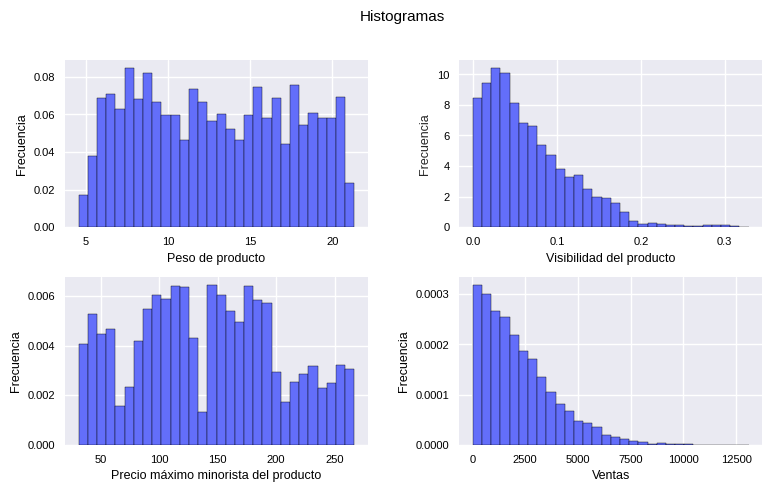

In [90]:
plt.style.use('seaborn')
plt.figure(figsize=(9, 5))

plt.subplot(2, 2, 1)
plt.hist(df_cln['item_w'], bins= 30, density=True, color="#636EFA", edgecolor='black')
plt.xlabel('Peso de producto', fontsize = 9, color='black')
plt.ylabel('Frecuencia', fontsize = 9, color='black')
plt.xticks(fontsize = 8, color='black')
plt.yticks(fontsize = 8, color='black')

plt.subplot(2, 2, 2)
plt.hist(df_cln['item_visib'], bins= 30, density=True, color="#636EFA", edgecolor='black')
plt.xlabel('Visibilidad del producto', fontsize = 9, color='black')
plt.ylabel('Frecuencia', fontsize = 9)
plt.xticks(fontsize = 8, color='black')
plt.yticks(fontsize = 8, color='black')

plt.subplot(2, 2, 3)
plt.hist(df_cln['item_mrp'], bins= 30, density=True, color="#636EFA", edgecolor='black')
plt.xlabel('Precio máximo minorista del producto', fontsize = 9, color='black')
plt.ylabel('Frecuencia', fontsize = 9, color='black')
plt.xticks(fontsize = 8, color='black')
plt.yticks(fontsize = 8, color='black')

plt.subplot(2, 2, 4)
plt.hist(df_cln['item_outlet_sales'], bins= 30, density=True, color="#636EFA", edgecolor='black')
plt.xlabel('Ventas', fontsize = 9, color='black')
plt.ylabel('Frecuencia', fontsize = 9, color='black')
plt.xticks(fontsize = 8, color='black')
plt.yticks(fontsize = 8, color='black')

plt.suptitle('Histogramas', fontsize = 11, color='black')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

El peso y MRP del producto tienen distribuciones que se aproximan a una normal. Las ventas y la visibilidad del producto, en cambio, siguen distribuciones sesgadas a la izquierda.

##Matriz de correlaciones

<ipython-input-118-9e5de7c45833>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

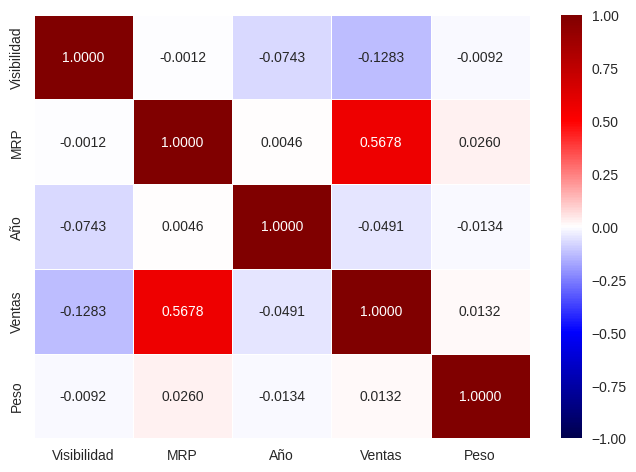

In [118]:
corr = df_cln.corr()
sns.heatmap(corr, annot=True, cmap='seismic', fmt=".4f", linewidth=.5,
            xticklabels = ['Visibilidad', 'MRP', 'Año', 'Ventas', 'Peso'],
            yticklabels = ['Visibilidad', 'MRP', 'Año', 'Ventas', 'Peso'],
            vmin=-1, vmax=1)

La matriz de correlación sugiere una relación positiva y moderada entre el precio y las ventas, mientras que entre la visibilidad y las ventas, la relación sería negativa pero muy baja.

##Analyzing item_mrp amd item_outlet_sales

In [132]:
fig = px.scatter(df_cln, x="item_mrp", y="item_outlet_sales", size="item_outlet_sales", color="outlet_type", hover_name="item_type",
                 labels={'item_outlet_sales' : 'Ventas', 'outlet_type' : '   Tipo de tienda', 'item_mrp' : 'MRP'},
                 size_max=40, color_discrete_sequence = px.colors.qualitative.Set1)
fig.update_xaxes(title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_legends(title_font=dict(size=15),
                   y=1.02, yanchor="top",
                   x=1.18, xanchor="right",
                   orientation="v")
fig.update_layout(font_family="Arial",
                  font_color="black",
                  title={'text':"<b>Precio máximo minorista y las ventas</b>", 'font':dict(size=16), 'automargin':True, 'yref':'container',
                         'y':0.94,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()
fig.write_html("g6.html")

Relación positiva entre el precio de los productos y las ventas, es decir, a mayor precio, mayores son las ventas. Al parecer los precios se agrupan en 4 intervalos de precios.